In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import shelve

In [2]:
dataset_name, print_legend = 'MetroInterStateTrafficVolume', False
# dataset_name, print_legend = 'BeijingPM2.5', True

In [3]:
filename = "results/{}-cum-losses.out".format(dataset_name)
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

In [4]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 6)
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markeredgecolor'] = mpl.colors.colorConverter.to_rgba('k', alpha=.45)

# markers = [(i, j, 0) for i in range(2, 10) for j in range(1, 3)]
markers = [',', 'o', 'v', 's', 'p', '*', 'P', 'X', 'D']

In [5]:
dim = len(ogds_cum_loss.keys())

Text(0.5, 0, 'learning rate scale')

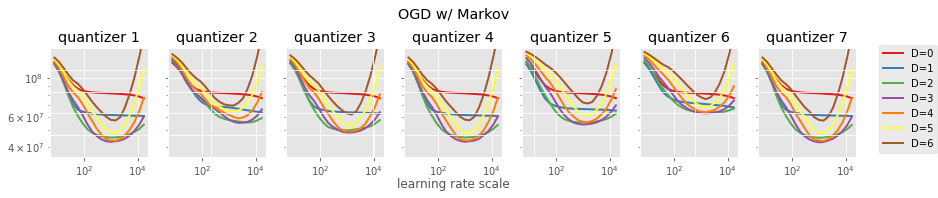

In [6]:
fig, ax = plt.subplots(nrows=1,
                       ncols=dim,
                       figsize=(14, 2),
                       sharey='all')

lines = []
for i in range(dim):
    lines = []
    ax[i].set_prop_cycle('color',[plt.cm.Set1(k) for k in np.linspace(0, 1, 9)])
    depths = ogds_cum_loss[i].keys()
    for (j, depth) in enumerate(depths):
        lr_scales = ogds_cum_loss[i][depth].keys()
        lines.append(
            ax[i].plot(lr_scales,
                       [ogds_cum_loss[i][depth][lr_scale] for lr_scale in lr_scales],
                       marker=None, label='D={}'.format(depth))[0]
        )

    # ax[i].legend(ncol=1)
    ax[i].ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    ax[i].set_title('quantizer {}'.format(i + 1))
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    if dataset_name.lower() == 'MetroInterStateTrafficVolume'.lower():
        ax[i].set_ylim([3.5 * 10 ** 7, 1.5 * 10 ** 8])
    else:
        ax[i].set_ylim([10 ** 6, 3 * 10 ** 6])
labels = ['D={}'.format(i) for i in range(dim)]
fig.legend(
    handles=lines,                # The line objects
    labels=labels,        # The labels for each line
    loc='center right',   # Position of legend
    ncol=1,
    borderaxespad=0.1,    # Small spacing around legend box
)
plt.subplots_adjust(right=0.925)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('OGD w/ Markov'.format(dataset_name), pad=30)
plt.xlabel("learning rate scale")
# plt.ylabel("cumulative loss")

# plt.savefig('figs/{}-ogd.pdf'.format(dataset_name),
#             bbox_inches='tight',
#             transparent=False)

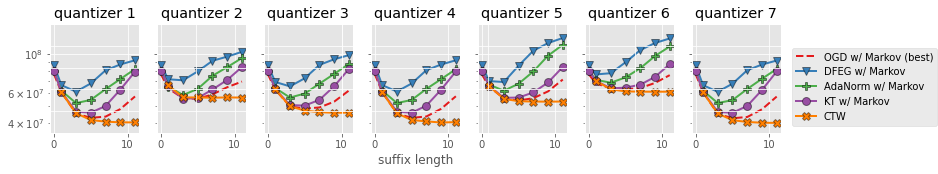

In [7]:
fig, ax = plt.subplots(nrows=1,
                       ncols=dim,
                       figsize=(14, 2),
                       sharey='all')
lines = []
for i in range(dim):
    ax[i].set_prop_cycle('color',[plt.cm.Set1(k) for k in np.linspace(0, 1, 9)])

    depths_markov = ogds_cum_loss[i].keys()
    l1 = ax[i].plot(depths_markov, 
                    [np.min([ogds_cum_loss[i][depth][lr_scale] for lr_scale in lr_scales]) for depth in depths_markov],
                    marker=None,
                    linestyle='--')[0]
    l2 = ax[i].plot(depths_markov,
                    [dfeg_markovs_cum_loss[i][depth] for depth in depths_markov],
                    marker='v')[0]
    l3 = ax[i].plot(depths_markov,
                    [adanorm_markovs_cum_loss[i][depth] for depth in depths_markov],
                    marker='P')[0]
    l4 = ax[i].plot(depths_markov,
                    [kt_markovs_cum_loss[i][depth] for depth in depths_markov],
                    marker='o')[0]

    max_depths_ctw = ctws_cum_loss[i].keys()
    l5 = ax[i].plot(max_depths_ctw,
                    [ctws_cum_loss[i][max_depth] for max_depth in max_depths_ctw],
                    marker='X')[0]
    lines = [l1, l2, l3, l4, l5]
    ax[i].set_title('quantizer {}'.format(i + 1))
    ax[i].set_yscale('log')
    if dataset_name.lower() == 'MetroInterStateTrafficVolume'.lower():
        ax[i].set_ylim([3.5 * 10 ** 7, 1.5 * 10 ** 8])
    else:
        ax[i].set_ylim([10 ** 6, 3 * 10 ** 6])
    
labels = ['OGD w/ Markov (best)',
          'DFEG w/ Markov', 'AdaNorm w/ Markov',
          'KT w/ Markov',
          # 'KT w/ hint',
          'CTW']
fig.legend(
    handles=lines,                # The line objects
    labels=labels,        # The labels for each line
    loc="center right",   # Position of legend
    borderaxespad=0.1,    # Small spacing around legend box
)
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.subplots_adjust(right=0.85)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

plt.xlabel("suffix length")
if dataset_name == 'MetroInterStateTrafficVolume':
    plt.ylabel("cumulative loss", labelpad=20)
# plt.savefig('figs/{}-statewise.pdf'.format(dataset_name),
#             pad_inches=0.2,
#             bbox_inches='tight',
#             transparent=False)

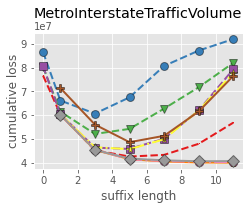

In [8]:
#%%

figwidth = 3.75 if dataset_name.lower() == 'MetroInterStateTrafficVolume'.lower() else 6
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(figwidth, 2.5))
ax.set_prop_cycle('color',[plt.cm.Set1(k) for k in np.linspace(0, 1, 9)])
l0 = ax.plot(depths_markov, [np.min([np.min([ogds_cum_loss[i][depth][lr_scale]
                                             for lr_scale in lr_scales])
                                     for i in range(dim)])
                             for depth in depths_markov],
             linestyle='--',
             marker=markers[0])[0]
l1 = ax.plot(depths_markov, [np.min([dfeg_markovs_cum_loss[i][depth]
                                     for i in range(dim)])
                             for depth in depths_markov],
             linestyle='--',
             marker=markers[1])[0]
l2 = ax.plot(depths_markov, [np.min([adanorm_markovs_cum_loss[i][depth]
                                     for i in range(dim)])
                             for depth in depths_markov],
             linestyle='--',
             marker=markers[2])[0]
l3 = ax.plot(depths_markov, [np.min([kt_markovs_cum_loss[i][depth]
                                     for i in range(dim)])
                             for depth in depths_markov],
             linestyle='--',
             marker=markers[3])[0]
l4 = ax.plot(max_depths_ctw, [np.min([ctws_cum_loss[i][max_depth]
                                      for i in range(dim)])
                              for max_depth in max_depths_ctw],
             marker=markers[4])[0]

depths_combine_markovs_dims = add_markovs_over_dims_cum_loss.keys()
l5 = ax.plot(depths_combine_markovs_dims, [add_markovs_over_dims_cum_loss[depth]
                                           for depth in depths_combine_markovs_dims],
             linestyle='-.',
             marker=markers[5])[0]
l6 = ax.plot(depths_combine_markovs_dims, [mix_markovs_over_dims_cum_loss[depth]
                                           for depth in depths_combine_markovs_dims],
             marker=markers[6],
             linestyle='solid')[0]

max_depths_combine_ctws_dims = add_ctws_over_dims_cum_loss.keys()
l7 = ax.plot(max_depths_combine_ctws_dims, [add_ctws_over_dims_cum_loss[depth]
                                            for depth in depths_combine_markovs_dims],
             marker=markers[7],
             linestyle='-.')[0]
l8 = ax.plot(max_depths_combine_ctws_dims, [mix_ctws_over_dims_cum_loss[depth]
                                            for depth in depths_combine_markovs_dims],
             marker=markers[8],
             linestyle='solid')[0]

from matplotlib.ticker import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

lines = [l0, l1, l2, l3, l4,
         l5, l6, l7, l8]
labels = ['OGD w/ Markov',
          'DFEG w/ Markov', 'AdaNorm w/ Markov',
          'KT w/ Markov',
          # 'KT w/ hint',
          'CTW',
          'Add. KTs w/ Markov (dim)', 'Mix. KTs w/ Markov (dim)',
          # 'Add. KTs w/ Markov (dim,depth)', 'Mix. KTs w/ Markov (dim,depth)',
          'Add. CTWs (dim)', 'Mix. CTWs (dim)']

if dataset_name.lower() != 'MetroInterStateTrafficVolume'.lower():
    legend = fig.legend(
        handles=lines,                # The line objects
        labels=labels,        # The labels for each line
        loc='center right',   # Position of legend
        ncol=1,
        borderaxespad=0.1,    # Small spacing around legend box
    )
    plt.subplots_adjust(right=0.6)

    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_alpha(0.0)

plt.title(dataset_name, pad=15)
plt.xlabel("suffix length")
if dataset_name.lower() == 'MetroInterStateTrafficVolume'.lower():
    plt.ylabel("cumulative loss", labelpad=0)
plt.savefig('figs/{}-summary.pdf'.format(dataset_name),
            bbox_inches='tight',
            transparent=False)
